# Link and Hyperlink Network Analysis (Web Graph Analysis)
Study the network of links between Portuguese news sites archived to understand connectivity and the influence of certain domains over 
time.

In [2]:
from open_site import *

In [2]:
_ , path = open_site("https://arquivo.pt/wayback/cdx?url=publico.pt/*&filter=url:noticia&filter=mime:html&output=json")
print("Cached file: " + path)
print()
with open(path, 'r') as f:
    i = 6
    for line in f:
        if i > 0:
            print(line,end="")
            i -= 1

with open(path, 'r') as f:
    lines = f.readlines()
    print("\nNumber of lines in the file: ", len(lines))

Cached file: .cache/7b12db21a86dd4dcd8394d4a6d26ce3650e103b126944aad4f347e81c10b487f.json

{"urlkey": "pt,publico)/%20culturaipsilon/noticia/o-cardume-da-poesia299050", "timestamp": "20191212000022", "url": "https://www.publico.pt/%20culturaipsilon/noticia/o-cardume-da-poesia299050", "mime": "text/html", "status": "404", "digest": "UKKWM6JJWDOQ3TF72MLQXKTKXPWZVGYY", "length": "67883", "offset": "89879873", "filename": "WEB-20191211235114560-p82.arquivo.pt.warc.gz", "collection": "EAWP28", "source": "$root:EAWP28.cdxj", "source-coll": "$root"}
{"urlkey": "pt,publico)/.../noticia/licao-gnr-1944846...", "timestamp": "20210119001145", "url": "https://www.publico.pt/.../noticia/licao-gnr-1944846...", "mime": "text/html", "status": "404", "digest": "UKKWM6JJWDOQ3TF72MLQXKTKXPWZVGYY", "length": "67926", "offset": "88659946", "filename": "WEB-20210119001120703-p100.arquivo.pt.warc.gz", "collection": "EAWP37", "source": "$root:EAWP37.cdxj", "source-coll": "$root"}
{"urlkey": "pt,publico)/145970

In [3]:
request_urls = lambda year, month: f"https://arquivo.pt/wayback/cdx?url=publico.pt/{year}/{month if month > 9 else '0'+str(month)}*&filter=url:noticia&filter=mime:html&output=json"

path_list = []
def collect_info(url_):
    _ , path = open_site(url_)
    path_list.append(path)
    with open(path, 'r') as f:
        lines = f.readlines()
        if len(lines) == 100000:
            print("\033[91m", end="")
            print(f"[WARNING] The file has 100000 lines {i}-{j}")
            print("\033[0m", end="")
            path_list.pop()
    
for i in range(1995, 2025):
    for j in range(1, 13):
        collect_info(request_urls(i, j))

[WARNING] The file has 100000 lines 2019-1
[WARNING] The file has 100000 lines 2020-9
[WARNING] The file has 100000 lines 2020-10


In [4]:
request_urls2 = lambda day: f"https://arquivo.pt/wayback/cdx?url=publico.pt/2020/9/{day}*&filter=url:noticia&filter=mime:html&output=json"
request_urls3 = lambda day: f"https://arquivo.pt/wayback/cdx?url=publico.pt/2020/10/{day}*&filter=url:noticia&filter=mime:html&output=json"
request_urls4 = lambda day: f"https://arquivo.pt/wayback/cdx?url=publico.pt/2019/1/{day}*&filter=url:noticia&filter=mime:html&output=json"
for day in range(1, 32):
    collect_info(request_urls2(day))
    collect_info(request_urls3(day))
    collect_info(request_urls4(day))

all_texts = ""
for path in path_list:
    with open(path, 'r') as f:
        all_texts += f.read()
with open(".cache/all_requests.txt", 'w') as f:
    f.write(all_texts)
with open(".cache/all_requests.txt", 'r') as f:
    lines = f.readlines()
    print("\nNumber of lines in the file: ", len(lines))


Number of lines in the file:  2545361


In [5]:
url_helena = "https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152"
parse_url(url_helena)

('https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152',
 '25/05/1996',
 'culturaipsilon',
 'entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152')

In [6]:
try:
    print(parse_url(url_helena+"?args=23")) # SHOULD ERROR !
except Exception as e:
    print(e)
try:
    print(parse_url(url_helena+"/embed")) # SHOULD ERROR !
except Exception as e:
    print(e)
try:
    print(parse_url(url_helena+"#comments")) # SHOULD ERROR !
except Exception as e:
    print(e)

Invalid url: 1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152?args=23
Invalid url: 1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152/embed
Invalid url: 1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152#comments


In [7]:
l = parse_big_file(".cache/all_requests.txt")
with open(".cache/filtered.json","w",encoding="utf-8") as f:
    f.write(json.dumps(l))

2545361


In [8]:
with open(".cache/filtered.json","r",encoding="utf-8") as f:
    l = json.loads(f.read())

In [9]:
print(len(l))
helena = l[url_helena]
helena

170809


{'url': 'https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152',
 'date': '25/05/1996',
 'category': 'culturaipsilon',
 'title': 'entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152',
 'number': 3,
 'timestamp': 20180801041640}

'<!doctype html>\n\n<html class="no-js user--anonymous" lang="pt">\n\n<head>\n\n    <meta charset="UTF-8">\n\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, shrink-to-fit=no, user-scalable=no">\n\n    <title>Entrevista a Helena Sá e Costa publicada em 25-05-1996 | A música não pode ficar estática | PÚBLICO</title>\n\n\t<meta itemprop="name" content="Entrevista a Helena Sá e Costa publicada em 25-05-1996">\n\n    <meta name="description" content="Faz amanhã 83 anos que Helena Sá e Costa nasceu, no Porto, no seio de uma família de artistas da música — dos quais o que mais se destacou foi o pai, o compositor e pianista Luís Costa. Mais de oito décadas depois, a pianista e professora que formou">\n\n    <meta name="keywords" content="Porto, Música, Cultura-Ípsilon">\n\n    <meta name="news_keywords" content="Porto, Música, Cultura-Ípsilon">\n\n\n\n    <link rel="amphtml" href="https://www.publico.pt/199
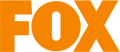
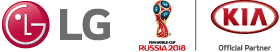

In [10]:
url = helena["url"]
timestamp = helena["timestamp"]
url = f"https://arquivo.pt/noFrame/replay/{timestamp}id_/{url}"
helena_file , path = open_site(url)
helena_file

In [11]:
urls_helena = extract_urls(helena_file)
urls_helena

{'http://blogues.publico.pt/provedordoleitor/',
 'http://cinecartaz.publico.pt',
 'http://cinecartaz.publico.pt/',
 'http://coleccoes.publico.pt',
 'http://comunique.publico.pt/cartaopublico/',
 'http://comunique.publico.pt/cartaopublico/#/',
 'http://emprego.publico.pt/',
 'http://feeds.feedburner.com/PublicoRSS',
 'http://imobiliario.publico.pt',
 'http://inimigo.publico.pt',
 'http://inimigo.publico.pt/',
 'http://lazer.publico.pt',
 'http://lazer.publico.pt/',
 'http://lazer.publico.pt/GuiaTV',
 'http://loja.publico.pt',
 'http://outdatedbrowser.com/pt-br',
 'http://p3.publico.pt',
 'http://p3.publico.pt/',
 'http://schema.org',
 'http://static.publico.pt/publicomais/',
 'http://static.publico.pt/sites/projectos/Publicitacao-Projecto-SI_IDT-PGlobal.pdf',
 'http://www.bmw.pt/teleservices',
 'http://www.w3.org/2000/svg',
 'https://a.brpx.io/ub.min.js',
 'https://acervo.publico.pt/utilizador/moderacao',
 'https://ajax.googleapis.com/ajax/libs/jquery/2.2.4/jquery.min.js',
 'https://api

In [12]:
urls2 = set()
for url in urls_helena:
        try:
            r = parse_url(url)
        except Exception as e:
            continue
        urls2.add(r[0])
print(urls2) # This urls migth not be in l dict but filters most links
process_site(url_helena, l, l[url_helena]["number"])

{'https://www.publico.pt/1996/05/25/culturaipsilon/noticia/entrevista-a-helena-sa-e-costa-publicada-em-25051996-1244152'}


('train/processed/3.txt', [3])

: 

In [ ]:
l2 = process_filtered_sites(l,24550)
l2[:5]

24879/170809

In [2]:
with open(".cache/filtered_and_connections.json", 'w') as f:
    f.write(json.dumps(l2))

NameError: name 'l2' is not defined

In [1]:
with open(".cache/filtered_and_connections.json", 'r') as f:
    s = f.read()
    l2 = json.loads(s)

FileNotFoundError: [Errno 2] No such file or directory: 'filtered_and_connections.json'

In [15]:
add_all_pages_to_neo4h(l2)

Progress: 170807/170807
Progress: 73994/170807

[#E41D]  _: <CONNECTION> error: Failed to read from defunct connection IPv4Address(('localhost', 7687)) (ResolvedIPv6Address(('::1', 7687, 0, 0))): TimeoutError('timed out')
Transaction failed and will be retried in 1.0307625472548334s (Failed to read from defunct connection IPv4Address(('localhost', 7687)) (ResolvedIPv6Address(('::1', 7687, 0, 0))))


Progress: 170807/170807


170806
170630


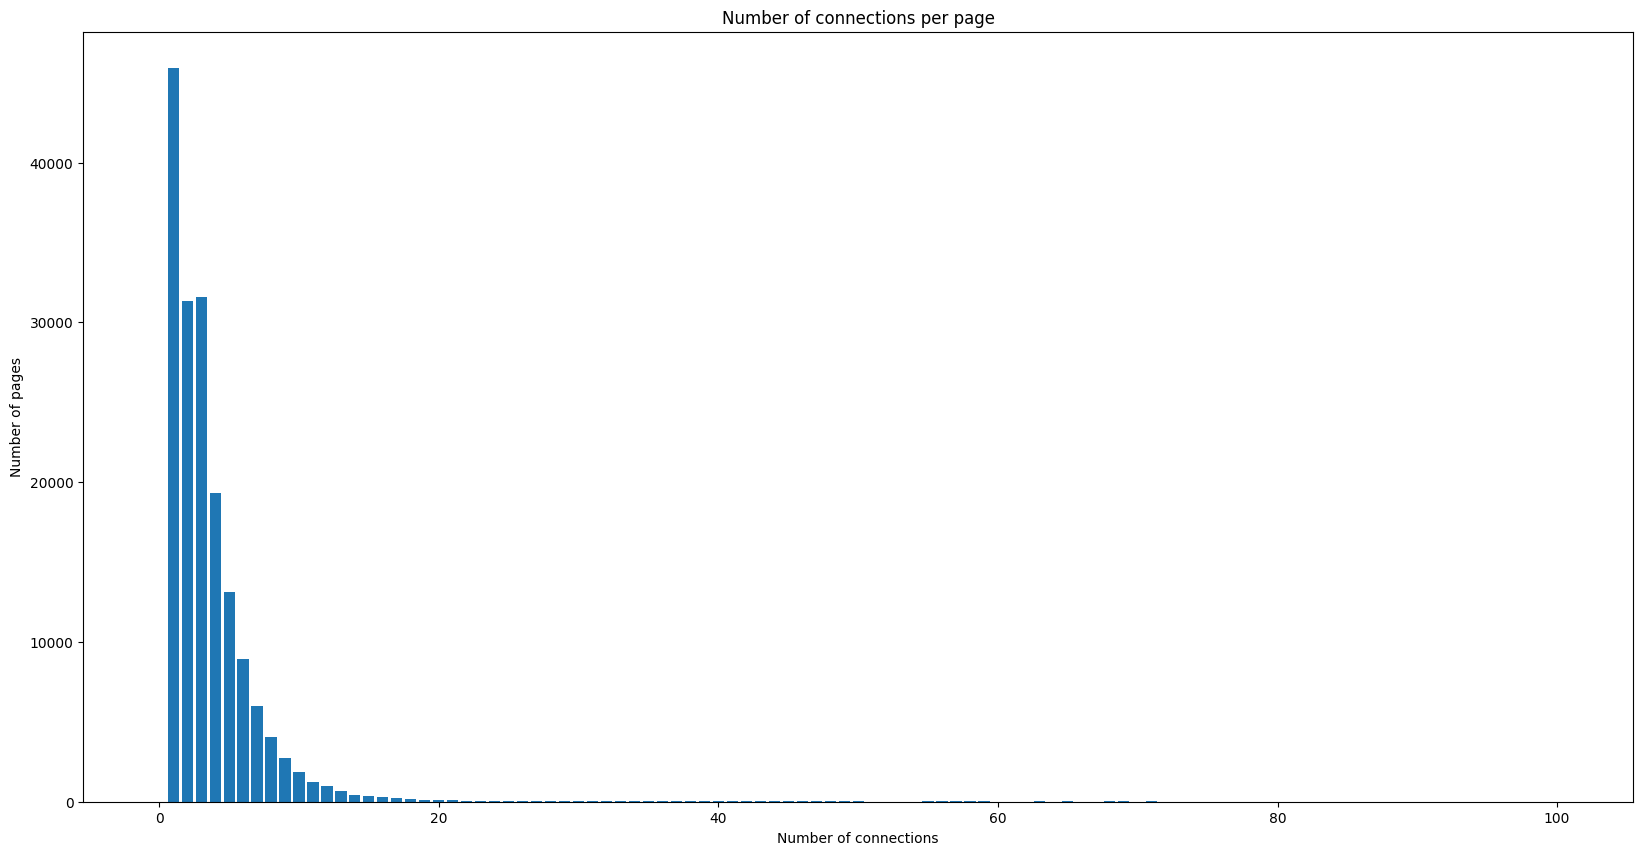

In [3]:
res = driver.execute_query("match (n)--() return n.number , count(*) as c order by c desc ")
c = [r['c'] for r in res.records][1:]
print(len(c))

bar_plot_bars = { i:0 for i in range(0, 101) }
for r in c:
    if r < 100:
        bar_plot_bars[r] += 1

print(sum(bar_plot_bars.values()))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.bar(bar_plot_bars.keys(), bar_plot_bars.values())
plt.xlabel("Number of connections")
plt.ylabel("Number of pages")
plt.title("Number of connections per page")
plt.show()

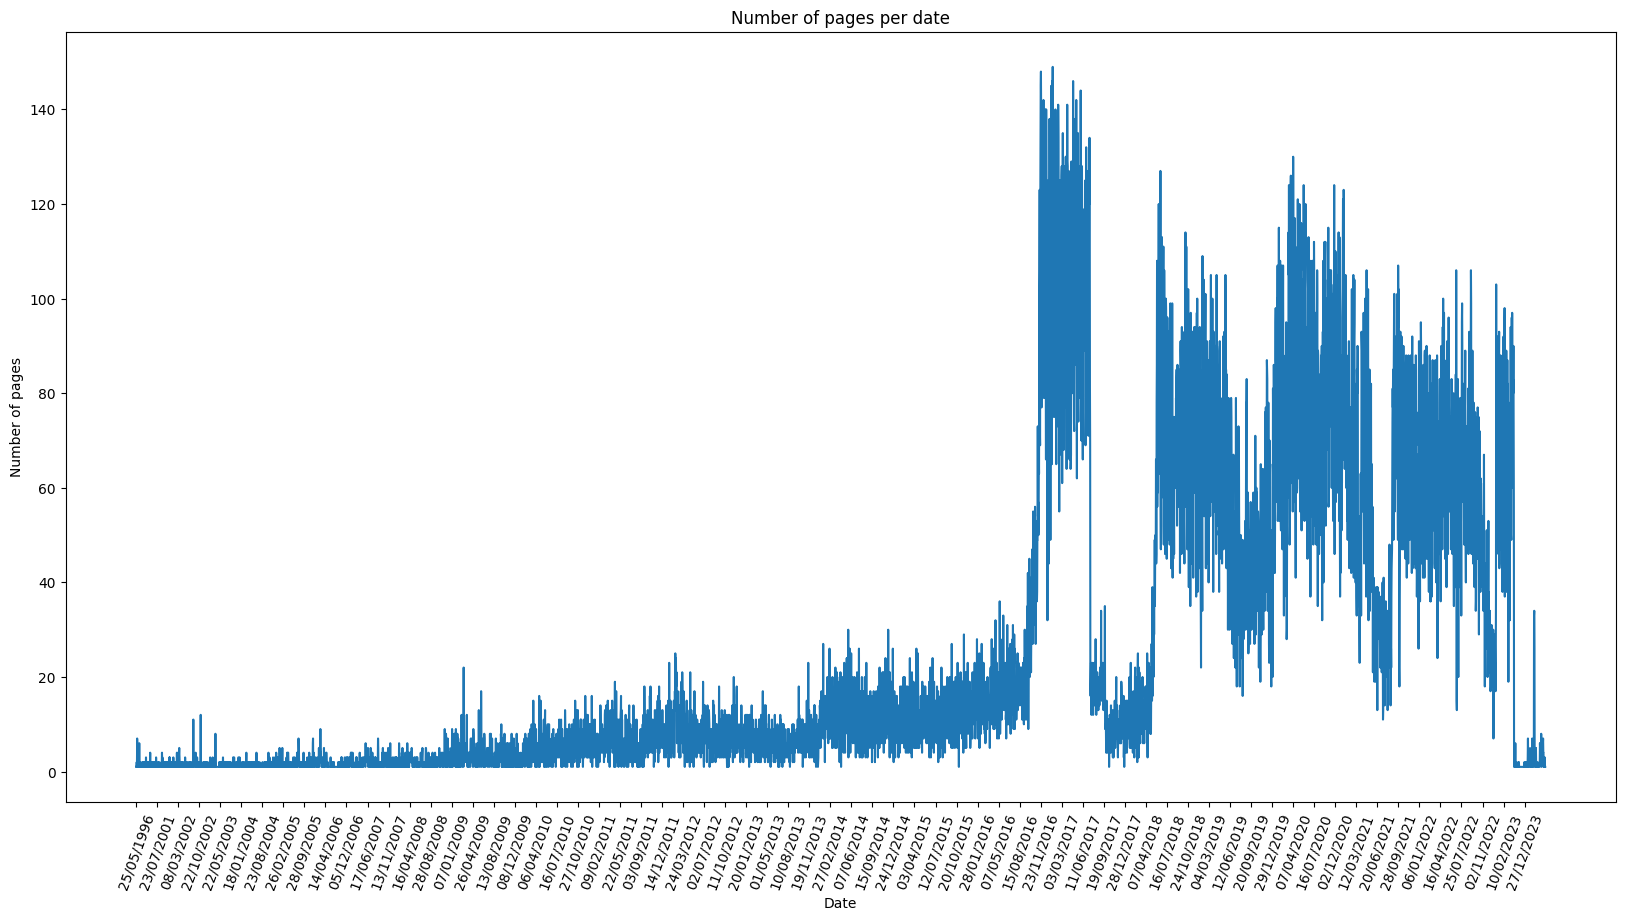

In [4]:
import datetime


res = driver.execute_query("match (n) return n.date as date, count(*) as c order by date desc")

plt.figure(figsize=(20,10))
dates = [(r['date'],r['c']) for r in res.records]

sort_func = lambda x: datetime.datetime.strptime(x[0], '%d/%m/%Y')
dates.sort(key=sort_func)

counts_date = [x[1] for x in dates]
dates_date = [x[0] for x in dates]

plt.plot(dates_date, counts_date)
plt.xlabel("Date")
plt.ylabel("Number of pages")
plt.xticks([d for i,d in enumerate(dates_date) if i%100==0], rotation=70)
plt.title("Number of pages per date")
plt.show()

In [13]:
documents = {}
i = 0
for root, dirs, files in os.walk("train/processed"):
    for file in files:
        with open(os.path.join(root, file), 'r', encoding="utf-8") as f:
            i = i +1
            if i % 100 == 0:
                print(f"\r{i}/{len(files)}",end="")
            documents[int(file.split(".")[0])] = f.read()
with open("train/processed/text.json", 'w', encoding="utf-8") as f:
    f.write(json.dumps(documents))
print(f"\r{i}/{len(files)}",end="")

170791/170791

In [23]:
with open("train/processed/text.json", 'r', encoding="utf-8") as f:
    text = json.loads(f.read())
text = { int(i):text[i] for i in sorted(text,key= lambda x: int(x))}

In [24]:
label_names = []
with open("train/labels/label_names.csv") as f:
    label_names = f.readline().strip().split(";")
print(label_names)
labels = {}
with open("train/labels/labels_1.txt") as f:
    for line in f:
        n , label = line.strip().split(":")
        labels[int(n)] = label
labels = {key: labels[key] for key in sorted(labels)}
list(labels.items())[:5]

['Sociedade', 'Politica', 'Mundo', 'Economia', 'Cultura', 'Desporto', 'Ciencia', 'Crime']


[(3, 'Desporto'),
 (10, 'Sociedade'),
 (20, 'Mundo'),
 (35, 'Politica'),
 (38, 'Cultura')]

In [25]:
documents = []
for i in labels.keys():
    documents.append(text[i])
len(documents)

19200

In [26]:
import numpy as np
Y = np.zeros((len(labels),))
for i,l in enumerate(labels.values()):
    Y[i] = label_names.index(l)
Y[:5]

array([5., 0., 2., 1., 4.])

In [27]:
documents[0]

'  pianista professora Helena Sá Costa hoje homenagear Porto Câmara atribui-lhe medalha honra cidade Fundação Engº. António Almeida editar biografia escrita Filipe Pires aluno mostrar ela piano fruto ensinamento senhora música feliz amanhã ano Helena Sá Costa nascer Porto seio família artista música destacar pai compositor pianista Luís Costa década pianista professora formar marcar várias geração músico melómano continuar surpreendê-los contemplá-los energia generosidade invulgar intervalo vaivém Porto-Guimarães causa Encontros Primavera dirigir preparação viagem Covilhã presidir júri regressar concurso música cidade atenção aluno continuar frequentar casa Helena Sá Costa falar Público homenagem prestar Porto recordar história família música figura   PUB PÚBLICO hoje homenagear presença ex-aluno direito livro biográfico HELENA SÁ COSTA Fiquei confusa presidente Fundação António Almeida dr. Aguiar Branco comunicar ir festa lançar livro fiquei contente escolha Filipe Pires escrever esti

In [28]:
tfi_mat , tfi_names = tfidf(documents,min_df=5, max_df=0.9)

In [29]:
tfi_mat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4082979 stored elements and shape (19200, 38770)>

In [53]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(tfi_mat)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
pca = pca.transform(tfi_mat)

[0.00848947 0.00807693 0.00592764]
0.022494044366886415


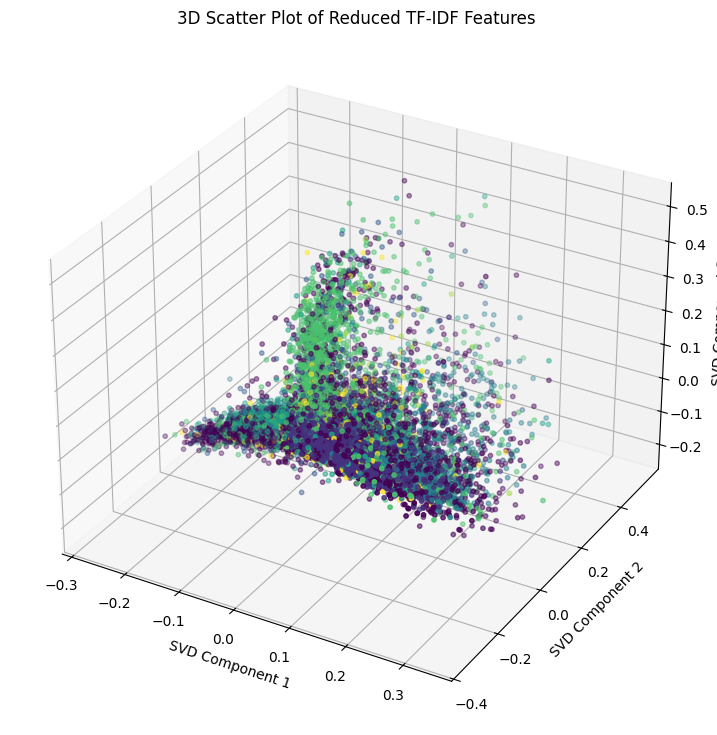

In [52]:
# scatter of points 3D
import matplotlib.pyplot as plt

# 3D plot
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(
    pca[:,0],  # X-axis
    pca[:,1],  # Y-axis
    pca[:,2],  # Z-axis
    c=Y,             # Color
    marker='o',           # Marker style
    s=10                  # Marker size
)

# Label axes
ax.set_xlabel('SVD Component 1')
ax.set_ylabel('SVD Component 2')
ax.set_zlabel('SVD Component 3')
ax.set_title('3D Scatter Plot of Reduced TF-IDF Features')
plt.show()

In [85]:
reduced_tfidf = tfi_mat

In [86]:
counts_label = { label: 0 for label in label_names }
for i in labels.values():
    counts_label[i] += len(documents) / len(labels)
print(len(labels))
counts_label

19200


{'Sociedade': 7173.0,
 'Politica': 1848.0,
 'Mundo': 1777.0,
 'Economia': 1823.0,
 'Cultura': 2535.0,
 'Desporto': 2736.0,
 'Ciencia': 494.0,
 'Crime': 814.0}

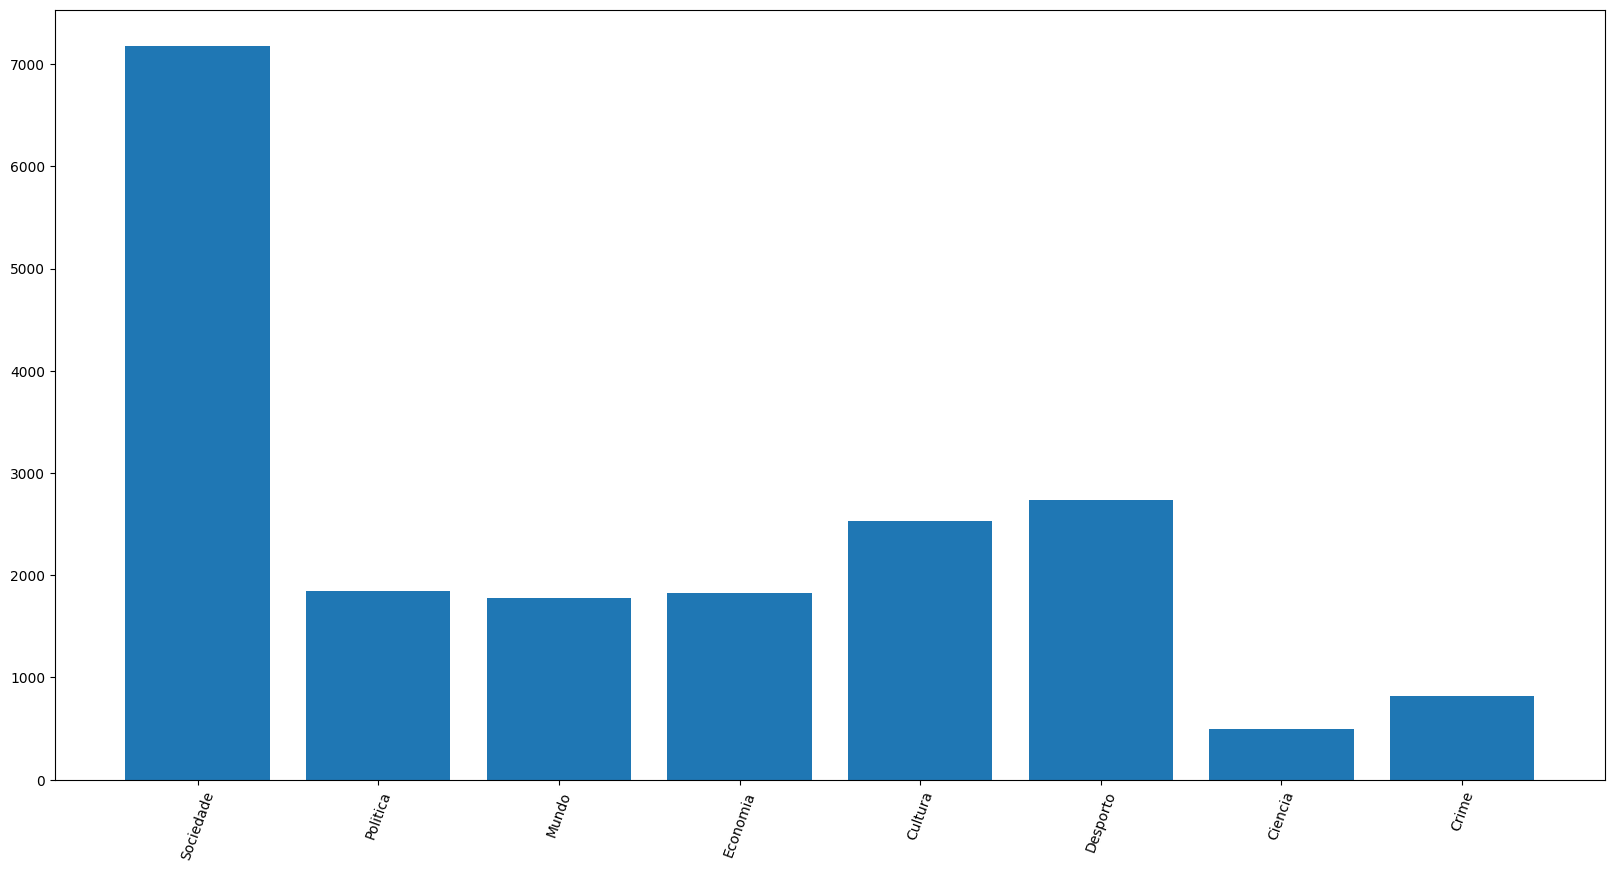

In [87]:
# plot hist of classes
plt.figure(figsize=(20,10))
plt.bar(list(counts_label.keys()),list(counts_label.values()))
plt.xticks(rotation=70)
plt.show()


In [88]:
# append labels to reduced_tfidf
# from reduced_tfidf extract only the rows of num_to_ind[number] where number is the key of labels labels
# reduced_tfidf_order = reduced_tfidf[[num_to_ind[number] for number in labels.keys()],:]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X = reduced_tfidf
# X = scaler.fit_transform(reduced_tfidf)

In [89]:
# make test and train 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train.shape , Y_train.shape

((14400, 38770), (14400,))

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

# Define the MLPClassifier
models = [
    MLPClassifier(
        hidden_layer_sizes=(8,8),  
        activation="relu",            
        solver="sgd",                
        max_iter=10000,                 
        random_state=42,              
        alpha=1,
        verbose=True
    ),
    LogisticRegression(max_iter=5000, random_state=42,penalty="l2",C=20,solver = "lbfgs",multi_class="ovr",verbose=True),
    RandomForestClassifier(n_estimators=50,max_depth=20)
]


model = VotingClassifier(
    estimators=[(str(i),model) for i, model in enumerate(models)],
    voting='soft'  # Use 'soft' for probability averaging; 'hard' for majority voting
)
model = models[0]
# Train the MLP on the training data
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, n_estimators=50)

In [113]:
# Predict on the test data
Y_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
accuracy_train = accuracy_score(Y_train, Y_train_pred)
print(f"Train Accuracy: {accuracy_train:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
print("\nConfussion Matrix")
print(confusion_matrix(Y_test, Y_pred))

Test Accuracy: 0.49
Train Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

         0.0       0.43      0.96      0.59      1798
         1.0       0.70      0.60      0.65       470
         2.0       1.00      0.00      0.00       431
         3.0       0.90      0.35      0.50       453
         4.0       0.71      0.06      0.12       635
         5.0       0.79      0.19      0.30       683
         6.0       0.00      0.00      0.00       126
         7.0       1.00      0.01      0.02       204

    accuracy                           0.49      4800
   macro avg       0.69      0.27      0.27      4800
weighted avg       0.65      0.49      0.39      4800


Confussion Matrix
[[1719   61    0    3    6    9    0    0]
 [ 179  284    0    5    1    1    0    0]
 [ 395   10    1    3    6   16    0    0]
 [ 273   20    0  158    0    2    0    0]
 [ 588    5    0    1   40    1    0    0]
 [ 534   16    0    6    0  127    0    0]
 [ 119 

C:\Users\kkiko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kkiko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kkiko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati